In [1]:
#Regression Task Using Vanilla Neural Network:

#import sklearn.datasets.fetch_california_housing

#The task is to predict the median house value in some California district, 
#given some data about these districts.


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import sklearn
from sklearn import  datasets
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

In [3]:
#1. Immporting the dataset:
cal_house = datasets.fetch_california_housing()
cal_house_df = pd.DataFrame(data= cal_house.data, columns=cal_house.feature_names)    
cal_house_df.head(5)
#now we have the dataset in a dataframe, we can start working on it.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
#2. Data Preprocessing:
print(cal_house_df.info())
print(cal_house_df.describe())
#the info shows that there are actually is no missing values at all, whuch is good and saves some steps for us.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.4

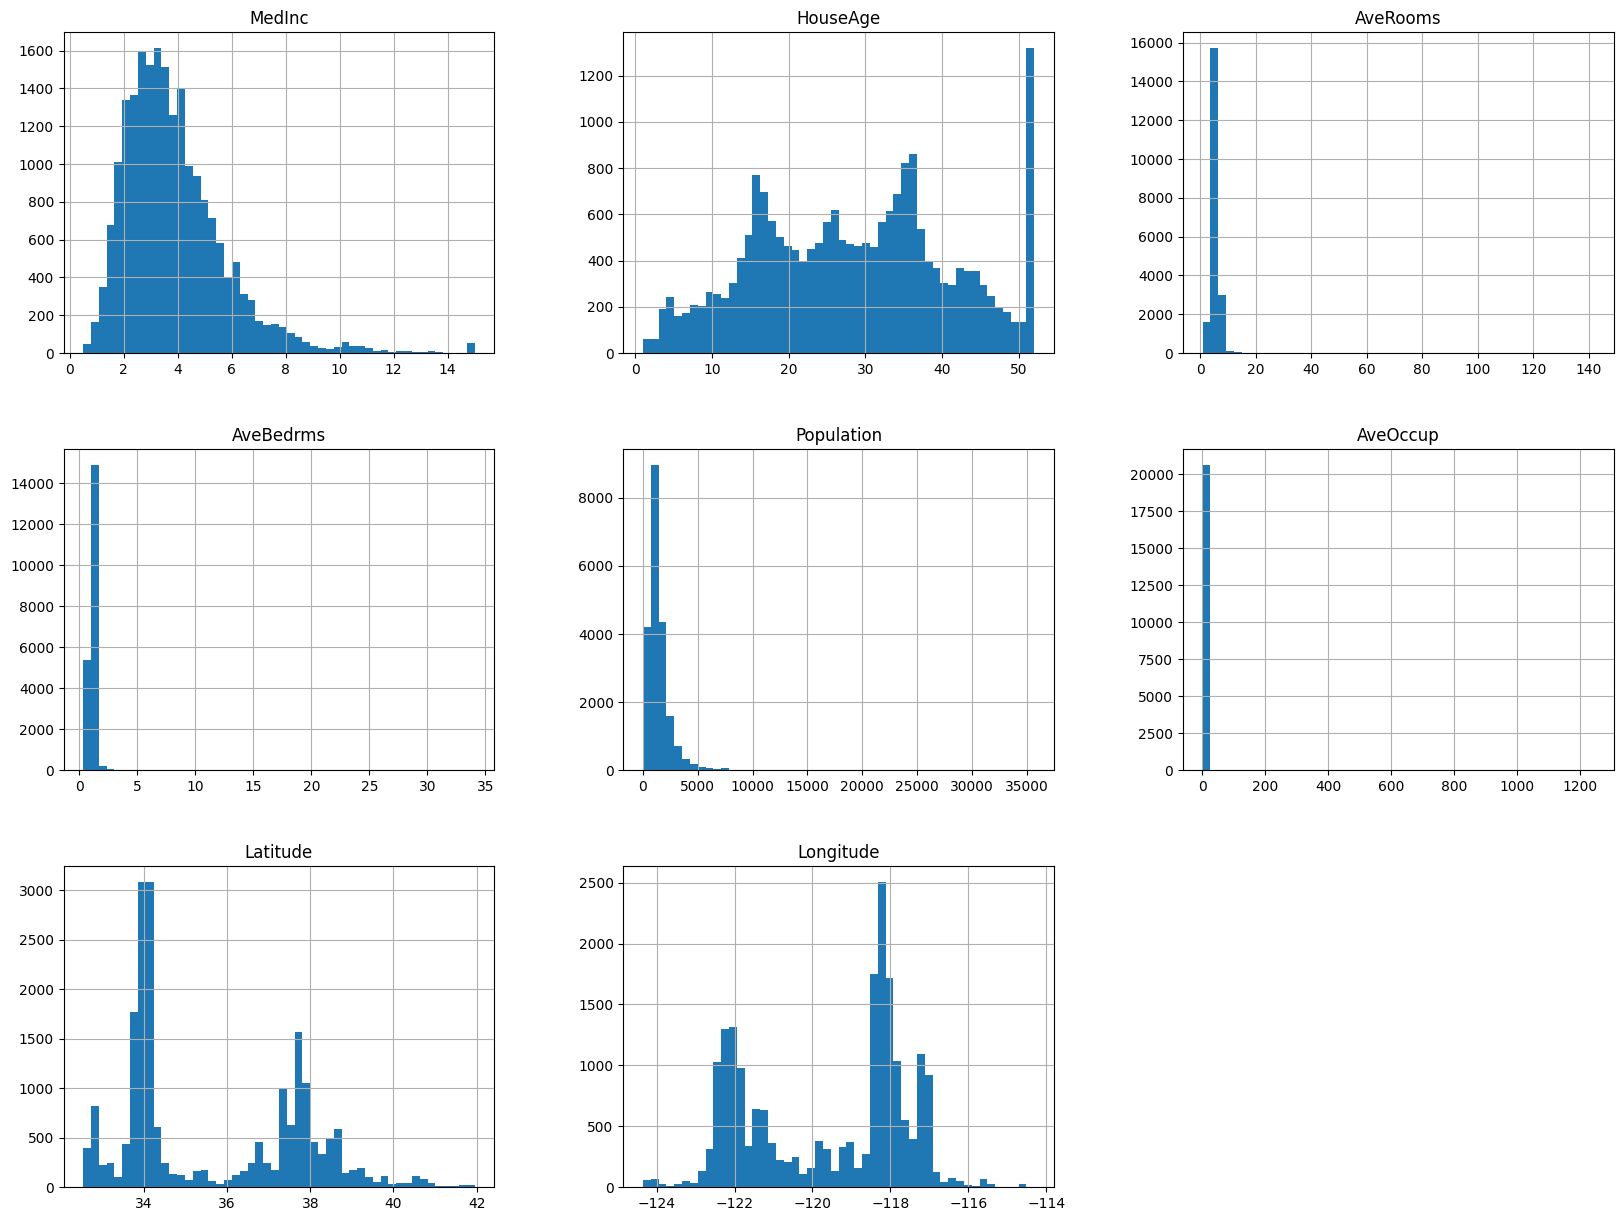

In [5]:
cal_house_df.hist(bins=50 , figsize=(20,15))
plt.show()

In [21]:
#3. Model Building:
#A Neural Network with 2 hidden layers is built using Keras. 
#The model is compiled using the mean squared error loss function and the stochastic gradient descent optimizer.
model = keras.Sequential() 
model.add(keras.layers.Dense(64, input_dim=7, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])    #the metrics are used for evaluation (MSE) just to make it easier for myself.


In [22]:
#to get the train and val data from the californa housing dataset after importing it, we use the train_test_split function:
X = cal_house_df.iloc[:, :-1].values
y = cal_house_df.iloc[:, [-1]].values
#this is to get the input (x) and its output (y) from the dataset.
print(X.shape, y.shape)

(20640, 7) (20640, 1)


In [23]:
#to get the train, test and val data from the californa housing dataset after importing it, we use the train_test_split function:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 ,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 7)
(4128, 7)
(16512, 1)
(4128, 1)


In [24]:
#4. Normalize the data:
MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
X_train = MinMaxScaler.fit_transform(X_train)
X_test = MinMaxScaler.transform(X_test)

In [25]:
#now after normalizing the data, we will try to use NN to predict the price of the house:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_test , y_test))


Epoch 1/30


516/516 [==============================] - 1s 1ms/step - loss: 4441.8071 - mean_squared_error: 4441.8071 - val_loss: 200.1353 - val_mean_squared_error: 200.1353
Epoch 2/30
516/516 [==============================] - 0s 890us/step - loss: 108.6677 - mean_squared_error: 108.6677 - val_loss: 46.7535 - val_mean_squared_error: 46.7535
Epoch 3/30
516/516 [==============================] - 0s 925us/step - loss: 22.0375 - mean_squared_error: 22.0375 - val_loss: 11.5370 - val_mean_squared_error: 11.5370
Epoch 4/30
516/516 [==============================] - 1s 1ms/step - loss: 6.5392 - mean_squared_error: 6.5392 - val_loss: 5.7208 - val_mean_squared_error: 5.7208
Epoch 5/30
516/516 [==============================] - 0s 913us/step - loss: 3.0580 - mean_squared_error: 3.0580 - val_loss: 2.5571 - val_mean_squared_error: 2.5571
Epoch 6/30
516/516 [==============================] - 0s 949us/step - loss: 1.4685 - mean_squared_error: 1.4685 - val_loss: 1.1872 - val_mean_squared_error: 1.1872
Epoch 7/30


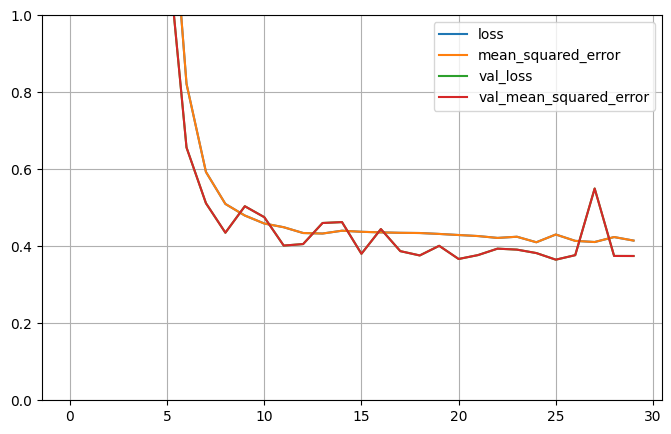

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()